In [4]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

In [5]:
stock_park = {
    'EG':'037370',
    '비트컴퓨터':'032850',
    '대유플러스':'000300',
    '대유에이텍':'002880',
    '서한':'011370'}

## 기간 설정
* 선거 이전: "2011-08-22", "2012-04-22"
* 선거 기간~당선 ("2012-04-23" ~ "2012-12-19")
* 당선이후 재임시절까지 ("2012-12-20" ~ "2017-03-10")

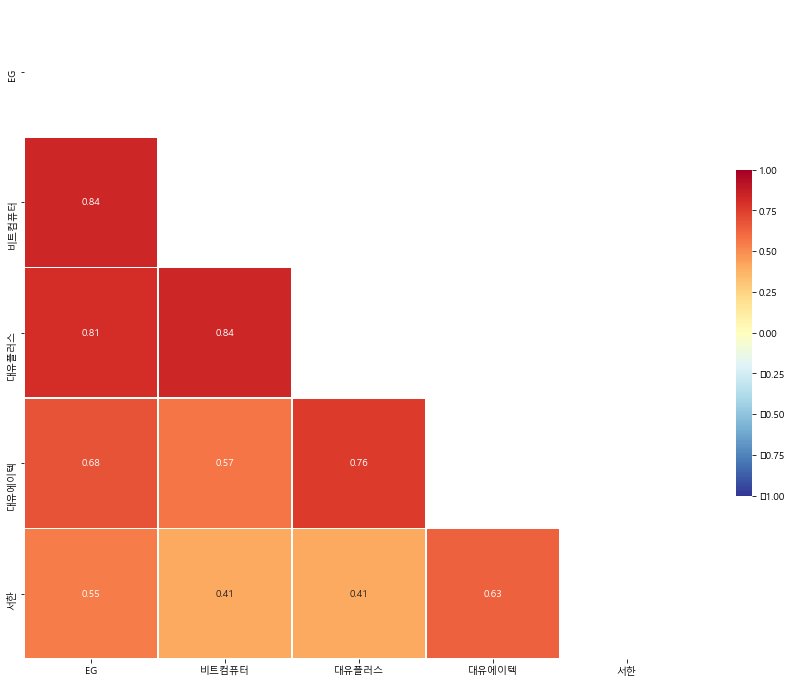

In [8]:
#선거 이전

item_list = []
for item_code in stock_park.values():
    change = fdr.DataReader(item_code, "2011-08-22", "2012-04-22")['Close']
    item_list.append(change)

park_1112 = pd.concat(item_list, axis=1)
park_1112.columns = stock_park.keys()
park_1112.reset_index(inplace=True)

park_1112 ['Date'] = pd.to_datetime(park_1112['Date'])
park_1112 .set_index('Date', inplace=True)


park_1112.corr = park_1112.corr() 

fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(park_1112.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(park_1112.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

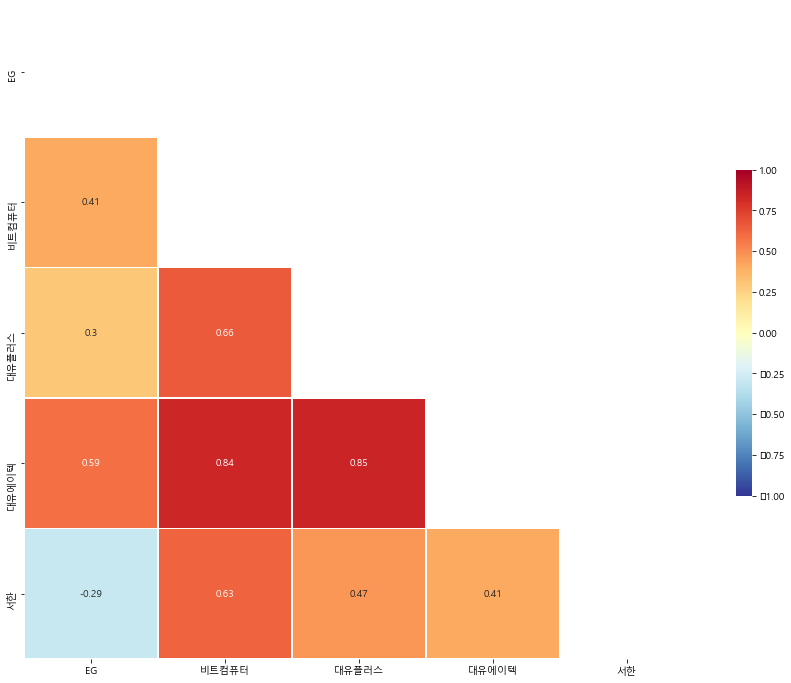

In [7]:
# 선거 기간~당선 ("2012-04-23" ~ "2012-12-19")

item_list = []
for item_code in stock_park.values():
    change = fdr.DataReader(item_code, "2012-04-23" , "2012-12-19")['Close']
    item_list.append(change)

park_elect = pd.concat(item_list, axis=1)
park_elect.columns =stock_park.keys()
park_elect.reset_index(inplace=True)

park_elect['Date'] = pd.to_datetime(park_elect['Date'])
park_elect.set_index('Date', inplace=True)

park_elect.corr = park_elect.corr() 

fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(park_elect.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(park_elect.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

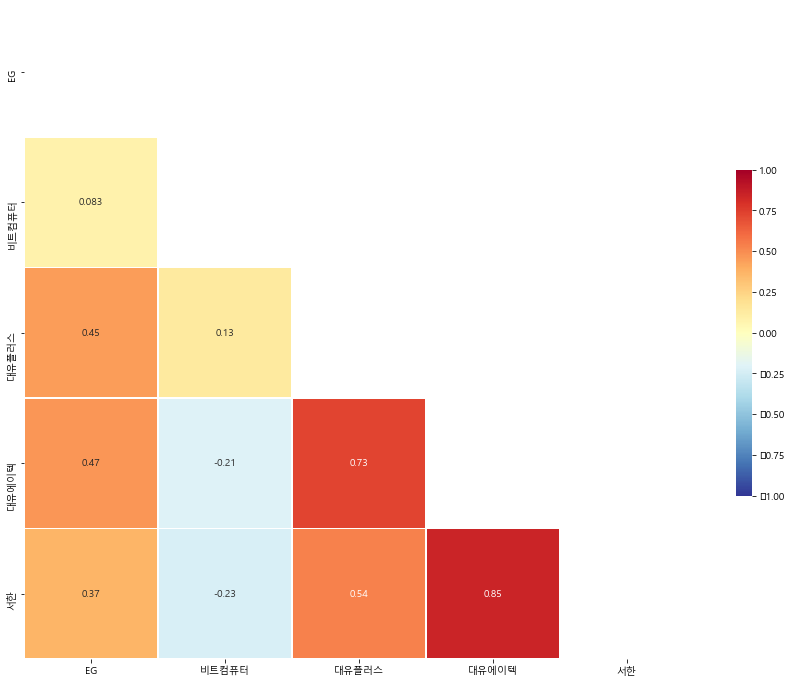

In [9]:
# 당선이후 재임시절까지 (2017-05-10 ~ 2021-10-01)

item_list = []
for item_code in stock_park.values():
    change = fdr.DataReader(item_code, "2017-05-10", "2021-10-01")['Close']
    item_list.append(change)

park_1721 = pd.concat(item_list, axis=1)
park_1721.columns = stock_park.keys()
park_1721.reset_index(inplace=True)

park_1721['Date'] = pd.to_datetime(park_1721['Date'])
park_1721.set_index('Date', inplace=True)

park_1721.corr = park_1721.corr() 

fig, ax = plt.subplots(figsize=(15,12) )

# 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(park_1721.corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵
sns.heatmap(park_1721.corr, 
            cmap = 'RdYlBu_r', 
            annot = True,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()